In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from preprocessing_data.utils import format_Dataframes

In [2]:
df = format_Dataframes(data_path="D:\-DSP391m-Forecasting-Financial-Time-Series-With-Transformer\craw_data\FPT_stock.xlsx", type_file="xlsx")
df.head(3)

,Tên,Ngày,Đóng cửa,Điều chỉnh,Thay đổi,Thay đổi 1,%,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
0,FPT,2024-05-21,136.0,--,3(2.26,3(2.26%),%),NaN,467.06,734.400,99.45,134.0,136.0,133.5
1,FPT,2024-05-20,133.0,--,-1.5(-1.12,-1.5(-1.12%),%),NaN,270.50,NaN,152.86,135.2,136.1,133.0
2,FPT,2024-05-17,134.5,--,-0.9(-0.66,-0.9(-0.66%),%),NaN,310.27,642.601,86.43,135.4,136.0,133.7


In [3]:
df.tail(3)

,Tên,Ngày,Đóng cửa,Điều chỉnh,Thay đổi,Thay đổi 1,%,Khối lượng (Khớp lệnh),Giá trị (Khớp lệnh),Khối lượng (Thỏa thuận),Giá trị (Thỏa thuận),Mở cửa,Cao nhất,Thấp nhất
4340,FPT,2006-12-15,441.0,2024-07-14 00:00:00,21(5.00,21(5.00%),%),265.30,0.12,30.0,0.01,441.0,441.0,441.0
4341,FPT,2006-12-14,420.0,14,20(5.00,20(5.00%),%),280.71,0.12,96.0,0.04,420.0,420.0,420.0
4342,FPT,2006-12-13,400.0,13.34,0(0.00,0(0.00%),%),83.53,0.03,0.0,0.00,400.0,400.0,400.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Tên                      4343 non-null   object        
 1   Ngày                     4343 non-null   datetime64[ns]
 2   Đóng cửa                 4343 non-null   float64       
 3   Điều chỉnh               4343 non-null   object        
 4   Thay đổi                 4343 non-null   object        
 5   Thay đổi 1               4343 non-null   object        
 6   %                        4343 non-null   object        
 7   Khối lượng (Khớp lệnh)   2858 non-null   float64       
 8   Giá trị (Khớp lệnh)      3960 non-null   float64       
 9   Khối lượng (Thỏa thuận)  4073 non-null   float64       
 10  Giá trị (Thỏa thuận)     4006 non-null   float64       
 11  Mở cửa                   4343 non-null   float64       
 12  Cao nhất                 4343 non-

In [5]:
def plot_price_changes(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(10, 6))
    df = df.sort_values(by='Ngày')
    sns.lineplot(x='Ngày', y='Đóng cửa', data=df, label='Giá đóng cửa')
    sns.lineplot(x='Ngày', y='Mở cửa', data=df, label='Giá mở cửa')
    plt.title('Sự thay đổi của giá đóng và giá mở theo thời gian')
    plt.xlabel('Ngày')
    plt.ylabel('Giá')
    plt.legend()
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

In [6]:
def plot_trading_volume(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(10, 6))
    df = df.sort_values(by='Ngày')
    sns.lineplot(x='Ngày', y='Khối lượng (Khớp lệnh)', data=df, label='Khối lượng (Khớp lệnh)')
    sns.lineplot(x='Ngày', y='Khối lượng (Thỏa thuận)', data=df, label='Khối lượng (Thỏa thuận)')
    plt.title('Sự thay đổi của khối lượng giao dịch khớp lệnh và thỏa thuận theo thời gian')
    plt.xlabel('Ngày')
    plt.ylabel('Khối lượng')
    plt.legend()
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

In [7]:
def plot_price_range(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(10, 6))
    df = df.sort_values(by='Ngày')
    df['Chênh lệch giá'] = df['Cao nhất'] - df['Thấp nhất']
    sns.lineplot(x='Ngày', y='Chênh lệch giá', data=df)
    plt.title('Sự chênh lệch giữa giá cao nhất và thấp nhất theo thời gian')
    plt.xlabel('Ngày')
    plt.ylabel('Chênh lệch giá')
    plt.xticks(rotation=45) 
    plt.tight_layout() 
    plt.show()


In [8]:
def plot_correlation_heatmap(df: pd.DataFrame) -> None:
    numeric_cols = df.select_dtypes(include=['float64']).columns
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Biểu đồ heatmap của mối tương quan giữa các biến')
    plt.show()

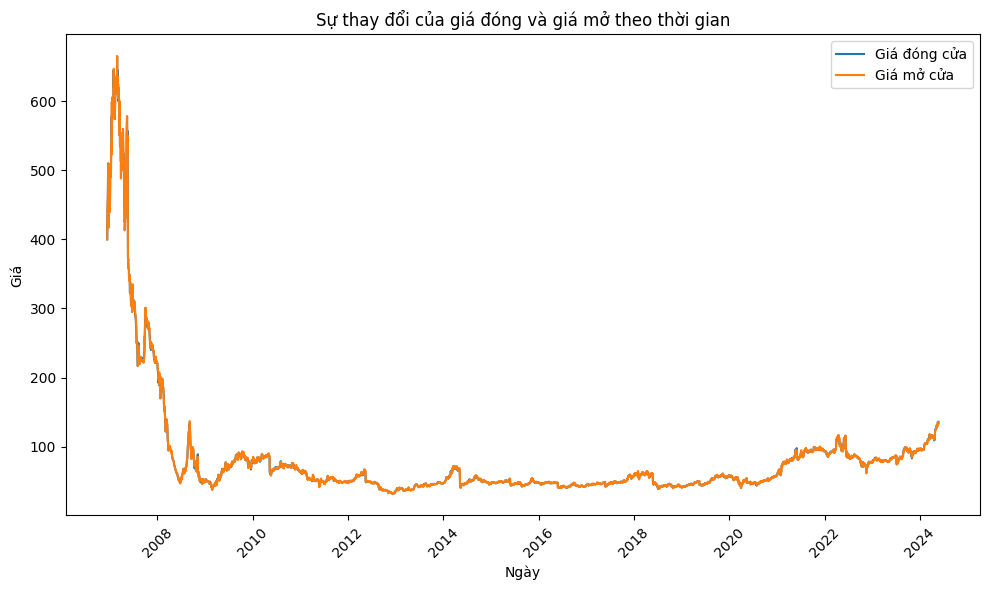

In [9]:
plot_price_changes(df)

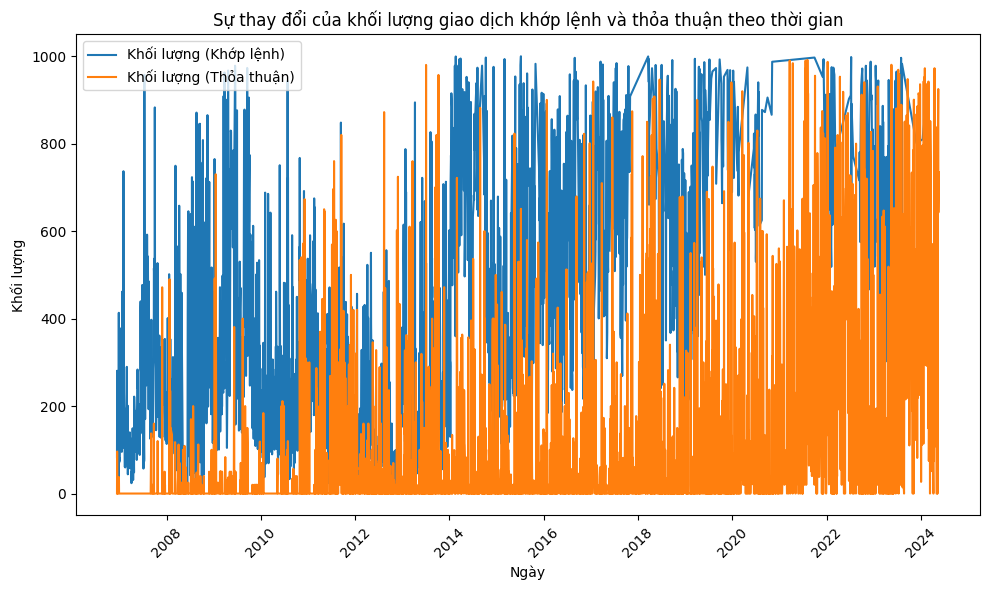

In [10]:
plot_trading_volume(df)

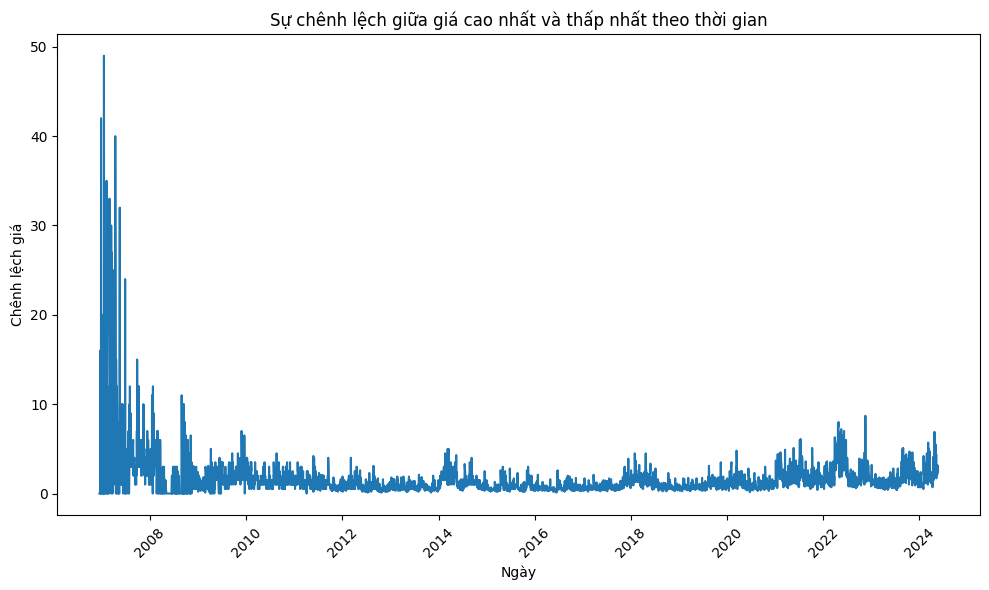

In [11]:
plot_price_range(df)

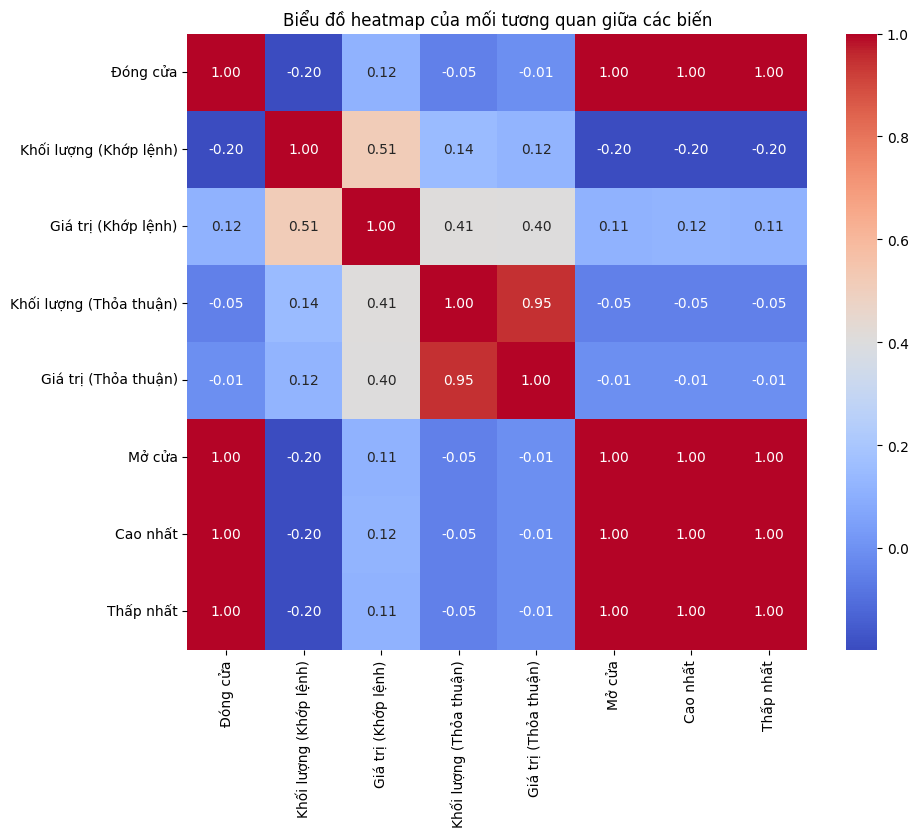

In [12]:
plot_correlation_heatmap(df)